In [1]:
# source "C:/Users/leand/venvs/pns/Scripts/activate"
# python -m ipykernel install --user --name=pns --display-name "pns"

import os
import pandas as pd
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
from tqdm import tqdm

# Módulos de interesse

- Modulo A, B e D: Contêm informações sociodemográficas 
- Modulo L: Crianças com menos de 2 anos 
- Módulo R: Saúde da Mulher 
- Modulo S: Pré-natal 
- Modulo W: Antropometria


# Analise de Dados

In [2]:
modulo_identificacao = [
    # Módulo de Identificacao
    "V0001",  # Unidade da Federação
    "V0024", # Estrato
    "UPA_PNS", # UPA
    "V0006_PNS", # Número ordem domicilio PNS
    "C00301", # Número ordem do morador
    "V0015", # Tipo da Entrevista
    "V0022", # Quantidade de moradores
    "V0026",  # Tipo de situação censitária
    "V0031", # Tipo de área Capital, Metropolitana
    ]
modulo_C = [
    # Módulo C - Caracteristicas gerais dos moradores
    "C001", # Quantidade de pessoas no domicilio
    "C006",  # Sexo
    "C00701",  # Dia de nascimento
    "C00702",  # Mês de nascimento
    "C00703",  # Ano de nascimento
    "C008",  # Idade do morador na data de referência
]
modulo_D = [
    # Módulo D - Cartacterisiticas de Educação dos Moradores
    "D00201",  # Frequenta escola ou creche
    "D00901",  # Qual foi o curso mais elevado que ___frequentou
]
modulo_G = [
    # Módulo G - Deficiecias maiores de 2 anos
    "G046",  # ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?
    "G049",  # ____________ faz uso de aparelho auditivo
    "G051",  # ____________ faz uso de implante coclear?
    "G053",  # ____________ faz uso de sistema de frequência modulada individual (sistema FM)?
    "G059",  # ___ usa algum aparelho de auxílio para se locomover?
    "G060",  # ____________ faz uso de cadeira de rodas?
    "G062",  # ____________ faz uso de bengala, muletas ou andador?
    "G064",  # ____________ faz uso de prótese?
    "G066",  # ____________ faz uso de órtese?
    "G070",  # ___ tem dificuldade permanente de caminhar ou subir degraus, mesmo usando prótese, bengala ou outro aparelho de auxílio? (Para moradores com 5 anos ou mais de idade.) OU Comparado com crianças da mesma idade, ___ tem dificuldade permanente para caminhar, mesmo usando prótese, bengala ou aparelho de auxílio? (Para moradores com 2 a 4 anos de idade.)
    "G072",  # ___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?
    "G073",  # ____________ faz uso de prótese para os membros superiores?
    "G079",  #  ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)
    "G083",  # Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)
    "G084",  # Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)
]
modulo_L = [
    # Módulo L - Crianças com menos de dois anos
    "L021",  # Foi realizado o teste do pezinho?
    "L033",  # O teste do coraçãozinho realizado deu resultado alterado?
    "L037",  # Vacina Penta (também chamada de Pentavalente, DTP/Hib/HB)
    "L038",  # Vacina Poliomielite (também chamada de gotinha, VIP, VOP, PÓLIO, ANTIPÓLIO, POLIOMIELITE, SABIN)
    "L039",  # Vacina Pneumocócica (também chamada de Pneumo 10, Pneumo 13, Pncc)
    "L040",  # Vacina Tríplice Viral (também chamada SCR, TRIVIRAL, TV, MMR).
    "L01701",  # Leite materno?
    "L018",  # Desde que ___________nasceu, tomou ou comeu outro alimento que não leite materno?
    "L019",  # Alguma vez ___________ recebeu Sulfato Ferroso?
]
modulo_P = [
    # Módulo P - Estilos de Vida
    "P00103",  # Peso - Informado (em kg) (3 inteiros e 1 casa decimal)
    "P00104",  # Peso - Final (em kg) (3 inteiros e 1 casa decimal)
    "P00403",  # Altura - Informada (em cm) (3 inteiros)
    "P00404",  # Altura - Final (em cm) (3 inteiros)
]
modulo_Q = [
    # Módulo Q - Doenças crônicas
    "Q00201",  # Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?
    "Q00202",  # Essa hipertensão arterial (pressão alta) ocorreu apenas durante algum período de gravidez?
    "Q003",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de hipertensão arterial (pressão alta)?
    "Q028",  # Em geral, em que grau a hipertensão ou alguma complicação da hipertensão limita as suas atividades habituais (como trabalhar, estudar, realizar afazeres domésticos etc.)?
    "Q03001",  # Algum médico já lhe deu o diagnóstico de diabetes?
    "Q03002",  # Esse diabetes ocorreu apenas durante algum período de gravidez?
    "Q031",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do diabetes?
    "Q055011",  # Problemas na vista
    "Q055012",  # Infarto ou AVC (Acidente Vascular cerebral) /derrame ou outro problema circulatório
    "Q055013",  # Problema nos rins
    "Q060",  # Algum médico já lhe deu o diagnóstico de colesterol alto?
    "Q061",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de colesterol alto?
    "Q06307",  # Infarto
    "Q06308",  # Angina
    "Q06309",  # Insuficiência cardíaca
    "Q06310",  # Arritmia
    "Q064",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico da doença do coração?
    "Q068",  # Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?
    "Q070",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do derrame (ou AVC)?
    "Q074",  # Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)?
    "Q075",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de asma?
    "Q079",  # Algum médico já lhe deu o diagnóstico de artrite ou reumatismo?
    "Q080",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de artrite ou reumatismo?
    "Q084",  # O(a) Sr(a) tem algum problema crônico de coluna, como dor crônica nas costas ou no pescoço, lombalgia, dor ciática, problemas nas vértebras ou disco?
    "Q085",  # Que idade o(a) Sr(a) tinha quando começou o problema na coluna?
    "Q087",  # Em geral, em que grau o problema na coluna limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q088",  # Algum médico já lhe deu o diagnóstico de DORT?
    "Q08901",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de DORT?
    "Q091",  # Em geral, em que grau o DORT limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?
    "Q092",  # Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?
    "Q09301",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão?
    "Q109",  # Em geral, em que grau a depressão limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q11007",  # Diagnóstico de Esquizofrenia
    "Q11008",  # Diagnóstico de Transtorno bipolar
    "Q11009",  # Diagnóstico de TOC (Transtorno obsessivo compulsivo)
    "Q111",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q11604",  # Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão, tais como enfisema pulmonar, bronquite crônica ou DPOC (Doença Pulmonar Obstrutiva Crônica)?
    "Q11605",  # Diagnóstico de enfisema pulmonar
    "Q11606",  # Diagnóstico de bronquite crônica
    "Q11701",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico dessa(s) doença(s) no pulmão?
    "Q120",  # Algum médico já lhe deu diagnóstico de câncer?
    "Q12201",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q124",  # Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?
    "Q125",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de insuficiência renal crônica?
]
modulo_R = [
    # Módculo R - Saúde da Mulher - 15 anos ou mais
    "R025",  # Com que idade a sra ficou menstruada pela primeira vez?
    "R026",  # A sra ainda fica menstruada?
    "R027",  # Com que idade a sra parou de menstruar?
    "R028",  # A sra já entrou na menopausa?
    "R029",  # Alguma vez a sra fez ou faz tratamento hormonal para alívio dos sintomas da menopausa (com comprimidos, adesivos, gel ou injeções)?
    "R034",  # A sra usa algum método para evitar a gravidez atualmente?
    "R035",  # Qual o principal motivo de não evitar a gravidez?
    "R03601",  # Pilula?
    "R037",  # A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
    "R038",  # Há quanto tempo a sra está tentando engravidar?
]
modulo_S = [
    # Módulo S - Atendimento pré-natal e parto - 15 anos ou mais
    "S065",  # Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?
    "S066",  # Quantos partos a Sra já teve?
    "S06703",  # Em que data foi o último parto?
    "S068",  # Quando estava grávida fez alguma consulta de pré-natal?
    "S06901",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S06902",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S070",  # Quantas consultas de pré-natal fez durante esta gravidez?
    "S082",  # Qual foi o resultado do teste/exame para sífilis?
    "S083",  # Recebeu tratamento para sífilis?
    "S086",  # Qual foi o resultado do teste/exame para sífilis do seu parceiro?
    "S087",  # O seu parceiro foi tratado?
    "S095",  # Durante o pré-natal a Sra foi orientada a usar preservativo?
    "S096",  # Quanto tempo antes do parto a Sra foi à última consulta do pré-natal?
    "S098",  # Quando estava grávida tomou alguma injeção para prevenir o bebê contra difteria e tétano (mal dos sete dias) – dT ou dTpa?
    "S099",  # Quantas doses dessa injeção tomou durante esta gravidez?
    "S09901",  # Número de doses
    "S110",  # Qual foi o peso dele(a) ao nascer?
    "S11001",  # Peso ao nascer (em quilogramas)
    "S112",  # Onde foi realizado o parto?
    "S115",  # Qual foi o tipo de parto?
    "S116",  # Nesta gravidez, entrou em trabalho de parto?
    "S117",  # Qual o principal motivo de ter tido parto cesáreo?
    "S118",  # Quantas semanas de gravidez tinha no momento do parto?
    "S11801",  # Quantidade de semanas
    "S125",  # Teve alguma complicação durante o parto?
    "S126",  # Você teve alguma complicação após o parto?
    "S127",  # Por causa dessa complicação precisou ser internada?
    "S130",  # Durante a primeira hora após o nascimento, seu(sua) filho(a) foi colocado(a) em contato com você pele a pele?
    "S131",  # Depois do nascimento, ele(a) ficou com você no quarto até a alta hospitalar?
    "S132",  # Seu(sua) filho(a) saiu do hospital junto com você?
    "S133",  # A criança não saiu do hospital junto com você porque:
    "S134",  # Você fez consulta de puerpério (consulta com médico ou enfermeiro até 42 dias após o parto)?
    "S136",  # Durante os primeiros três meses após o parto, você tomou medicamento contendo somente ferro ou ferro com vitaminas?
]
modulo_W = [
    # Módulo W - Antropometria
    "W001",  # Antropometria aferida do morador selecionado
    "W00101",  # Peso - 1ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00102",  # Peso - 2ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00103",  # Peso - Final (em kg)(3 inteiros e 1 casa decimal)
    "W00201",  # Altura - 1ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00202",  # Altura - 2ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00203",  # Altura - Final (em cm)(3 inteiros e 1 casa decimal)
    "VDL001",  # Idade em meses das crianças nascidas no período de referência do Módulo L
]

In [3]:
colunas_interesse = modulo_identificacao + modulo_C + modulo_D + modulo_G + modulo_L + modulo_P + modulo_Q + modulo_R + modulo_S + modulo_W

In [4]:

dataframes = []

for i in tqdm(range(21)):  # Arquivos de 0 a 20
    df = pd.read_csv(f"https://raw.githubusercontent.com/LeandroCoelhos/Notebook_PNS/refs/heads/main/data/pns2019_{i}.csv", usecols=colunas_interesse)
    #df = pd.read_csv(f"pns2019_{i}.csv")
    dataframes.append(df)
# Armazenar em um unico Dataframe
pns_2019 = pd.concat(dataframes, ignore_index=True)
pns_2019.info(show_counts=True, verbose=True)

100%|██████████| 21/21 [00:42<00:00,  2.03s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 140 columns):
 #    Column     Non-Null Count   Dtype  
---   ------     --------------   -----  
 0    V0001      293726 non-null  int64  
 1    V0024      293726 non-null  int64  
 2    UPA_PNS    293726 non-null  int64  
 3    V0006_PNS  293726 non-null  int64  
 4    V0015      293726 non-null  int64  
 5    V0022      279382 non-null  float64
 6    V0026      293726 non-null  int64  
 7    V0031      293726 non-null  int64  
 8    C001       279382 non-null  float64
 9    C00301     279382 non-null  float64
 10   C006       279382 non-null  float64
 11   C00701     279382 non-null  float64
 12   C00702     279382 non-null  float64
 13   C00703     279382 non-null  float64
 14   C008       279382 non-null  float64
 15   D00201     279382 non-null  float64
 16   D00901     178013 non-null  float64
 17   G046       101134 non-null  float64
 18   G049       2017 non-null    float64
 19   

In [5]:
pns_2019['chave_domicio'] = pns_2019['V0001'].astype(str) + '_' + pns_2019['V0024'].astype(str) + '_' + pns_2019['UPA_PNS'].astype(str) + '_' + pns_2019['V0006_PNS'].astype(str)
pns_2019['chave_pessoa']  = pns_2019['V0001'].astype(str) + '_' + pns_2019['V0024'].astype(str) + '_' + pns_2019['UPA_PNS'].astype(str) + '_' + pns_2019['V0006_PNS'].astype(str) + '_' + pns_2019['C00301'].astype(str)

In [6]:
df = pns_2019.copy()
# Dicionário para renomear as colunas
rename_columns = {
    "V0001": "UF",
    "V0024":"Estrato",
    "UPA_PNS":"UPA",
    "V0006_PNS":"N_ordem_domicilio_PNS",
    "C00301":"N_ordem_morador",
    "C001":"N_pessoas_domicilio",
    "V0022":"Quantidade_moradores",
    "V0015":'tipo_entrevista',
    "V0026": "regiao_metropolitana",
    "V0031": "capital_metropolitana",
    "C006": "sexo",
    "C00701": "dia_nascimento",
    "C00702": "mes_nascimento",
    "C00703": "ano_nascimento",
    "C008": "idade",
    "P00103": "peso_info_kg",
    "P00104": "peso_final_kg",
    "P00403": "altura_info_cm",
    "P00404": "altura_final_cm",
    "W001": "antropometria_aferida_morador",
    "W00101": "peso_1_pesagem_kg",
    "W00102": "peso_2_pesagem_kg",
    "W00103": "peso_final_medido_kg",
    "W00201": "altura_1_medicao_cm",
    "W00202": "altura_2_medicao_cm",
    "W00203": "altura_final_medida_cm",
}

# Renomear as colunas no DataFrame
# df.rename(columns=rename_columns, inplace=True)

# Iterar sobre as colunas do dicionário e criar novas colunas
for original_col, new_col in rename_columns.items():
    if original_col in df.columns:  # Verificar se a coluna original existe no DataFrame
        df[new_col] = df[original_col]  # Criar a nova coluna com os mesmos valores da original


In [7]:
# Preencher a coluna de estado
estados = {
    11: "Rondônia",
    12: "Acre",
    13: "Amazonas",
    14: "Roraima",
    15: "Pará",
    16: "Amapá",
    17: "Tocantins",
    21: "Maranhão",
    22: "Piauí",
    23: "Ceará",
    24: "Rio Grande do Norte",
    25: "Paraíba",
    26: "Pernambuco",
    27: "Alagoas",
    28: "Sergipe",
    29: "Bahia",
    31: "Minas Gerais",
    32: "Espírito Santo",
    33: "Rio de Janeiro",
    35: "São Paulo",
    41: "Paraná",
    42: "Santa Catarina",
    43: "Rio Grande do Sul",
    50: "Mato Grosso do Sul",
    51: "Mato Grosso",
    52: "Goiás",
    53: "Distrito Federal",
}

df['UF_sigla'] = df['UF'].map(estados)

# Mapeamento direto de estados para suas macroregiões
estado_para_regiao = {
    "Rondônia": "Norte",
    "Acre": "Norte",
    "Amazonas": "Norte",
    "Roraima": "Norte",
    "Pará": "Norte",
    "Amapá": "Norte",
    "Tocantins": "Norte",
    "Maranhão": "Nordeste",
    "Piauí": "Nordeste",
    "Ceará": "Nordeste",
    "Rio Grande do Norte": "Nordeste",
    "Paraíba": "Nordeste",
    "Pernambuco": "Nordeste",
    "Alagoas": "Nordeste",
    "Sergipe": "Nordeste",
    "Bahia": "Nordeste",
    "Minas Gerais": "Sudeste",
    "Espírito Santo": "Sudeste",
    "Rio de Janeiro": "Sudeste",
    "São Paulo": "Sudeste",
    "Paraná": "Sul",
    "Santa Catarina": "Sul",
    "Rio Grande do Sul": "Sul",
    "Mato Grosso do Sul": "Centro-Oeste",
    "Mato Grosso": "Centro-Oeste",
    "Goiás": "Centro-Oeste",
    "Distrito Federal": "Centro-Oeste",
}

# Adicionar a coluna 'regiao_brasileira' ao DataFrame
df['regiao_brasileira'] = df['UF_sigla'].map(estado_para_regiao)

#Mapear região
regiao = {
    1: "Urbano",
    2: "Rural",
}
df['regiao_metropolitana'] = df['regiao_metropolitana'].map(regiao)

# Dicionário de mapeamento
regioes_map = {
    1: "Capital",
    2: "Região Metropolitana, excluindo a capital",
    3: "RIDE, excluindo a capital",
    4: "Interior"
}
df['capital_metropolitana'] = df['capital_metropolitana'].map(regioes_map)

# Dicionário de Sexo
sexo = {
    1: "Masculino",
    2: "Feminino"
}
df['sexo'] = df['sexo'].map(sexo)

# Pesquisa realizada
status_domicilios = {
    1: "Realizada",
    2: "Domicílio Fechado",
    3: "Recusa",
    4: "Outro Motivo",
    5: "Domicílio Vago",
    6: "Domicílio de uso ocasional",
    7: "Domicílio coletivo ou improvisado",
    8: "Domicílio em obras ou em ruínas",
    9: "Domicílio demolido",
    10: "Domicílio não encontrado",
    11: "Unidade não residencial",
    12: "Domicílio fora do setor",
}
df['tipo_entrevista'] = df['tipo_entrevista'].map(status_domicilios)

In [8]:
df.shape, df.drop_duplicates().shape

((293726, 170), (293726, 170))

In [9]:
cols = df.columns
for col in cols:
  print(df[col].value_counts(dropna=False))
  print('\n\n')

V0001
35    18504
21    17912
31    15421
23    15281
33    14776
15    14393
13    13074
26    12381
41    11694
29    11061
32    10673
42    10607
27    10474
43    10369
25    10094
24     9964
22     9044
50     8766
52     8506
14     8476
12     8270
28     8140
53     7609
51     7607
11     7391
16     6640
17     6599
Name: count, dtype: int64



V0024
1210010    3691
1410011    3138
2710111    2720
2410011    2569
1250020    2484
           ... 
3220020      61
4230020      54
3321020      54
4220020      47
3532020      45
Name: count, Length: 574, dtype: int64



UPA_PNS
130033536    94
160007292    93
140004603    88
140008399    87
140002449    86
             ..
350286470    14
410182027    14
270018200    14
210092069    13
230030392    12
Name: count, Length: 8031, dtype: int64



V0006_PNS
2     21905
7     21764
11    21746
1     21743
12    21723
10    21707
3     21643
6     21587
9     21552
5     21525
8     21503
4     21208
13    10242
15    10228
14    10099


# Dados não informados na pesquisa

5% - 16342 não informaram Data de nascimento

67,8% sem informação de peso e Altura

Sessão W - 2,5% dos entrevistados foram Aferidos

# Limpeza

- Somente entrevistas realizadas
- Informações de Idade


In [10]:
print('Antes:', df.shape)
# Entrevistas realizadas
df = df[df['tipo_entrevista']=='Realizada'].reset_index(drop=True)
print('Depois:', df.shape)

Antes: (293726, 170)
Depois: (279382, 170)


In [11]:
print('Antes:', df.shape)
# Idade Informada
df = df[~df['idade'].isna()].reset_index(drop=True)
print('Depois:', df.shape)

Antes: (279382, 170)
Depois: (279382, 170)


# Criação de novas Features

## Ano Nascimento Inferido pela idade

In [12]:
df['ano_nascimento_inferido'] = np.where(df['ano_nascimento']==9999, 2019 - df['idade'], df['ano_nascimento'])

## IMC

In [13]:
# Calcular o IMC
# Função para calcular o IMC
def calcular_imc(row):
    """
    Calcula o IMC com base no peso (kg) e altura (cm).
    :param row: Linha do DataFrame.
    :return: Valor do IMC (float) ou None se peso ou altura forem nulos.
    """
    if pd.notnull(row['peso']) and pd.notnull(row['altura']) and row['altura'] > 0:
        altura_metros = row['altura'] / 100  # Converter altura de cm para metros
        return row['peso'] / (altura_metros ** 2)
    return None

# Função para classificar o IMC
def classificar_imc(imc):
    if pd.isnull(imc):
        return None, None
    elif imc < 18.5:
        return "Magreza", 0
    elif 18.5 <= imc < 25:
        return "Normal", 0
    elif 25.0 <= imc < 30:
        return "Sobrepeso", 1
    elif 30.0 <= imc < 40:
        return "Obesidade", 2
    elif imc >= 40.0:
        return "Obesidade Grave", 3
    return None, None


In [14]:
# Peso unico, usar medido, ou informado
df['peso'] = np.where(df['peso_final_kg'].isna(), df['peso_info_kg'], df['peso_final_kg'])
# Peso Altura, usar medido, ou informado
df['altura'] = np.where(df['altura_final_cm'].isna(), df['altura_info_cm'], df['altura_final_cm'])

# Aplicar a função ao DataFrame
df['imc'] = df.apply(calcular_imc, axis=1)

# Aplicar a função e criar as colunas 'imc_classificacao' e 'imc_grau_obesidade'
df[['imc_classificacao', 'imc_grau_obesidade']] = df['imc'].apply(
    lambda x: pd.Series(classificar_imc(x))
)

In [15]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279382 entries, 0 to 279381
Data columns (total 176 columns):
 #    Column                         Non-Null Count   Dtype  
---   ------                         --------------   -----  
 0    V0001                          279382 non-null  int64  
 1    V0024                          279382 non-null  int64  
 2    UPA_PNS                        279382 non-null  int64  
 3    V0006_PNS                      279382 non-null  int64  
 4    V0015                          279382 non-null  int64  
 5    V0022                          279382 non-null  float64
 6    V0026                          279382 non-null  int64  
 7    V0031                          279382 non-null  int64  
 8    C001                           279382 non-null  float64
 9    C00301                         279382 non-null  float64
 10   C006                           279382 non-null  float64
 11   C00701                         279382 non-null  float64
 12   C00702        

# Clusterização

## Mães - Mulheres que tiveram filhos

- Usar as variáveis do Módulo S para identificar mulheres que tiveram Filhos (S066)
- Que informaram data de ultimo parto S06703
- Ver se o ultimo parto foi nos ultimos 6~7 anos. Para cruzar com o cluster de crianças e bater que elas de fato são mae e filha (aproximadamente)

In [45]:
pd.set_option('display.max_rows', 100)

In [46]:
colunas_criadas = ['Quantidade_moradores', 'chave_domicio', 'chave_pessoa', 'UF_sigla', 'regiao_brasileira', 'regiao_metropolitana',  'sexo',
                   'dia_nascimento', 'mes_nascimento', 'ano_nascimento', 'idade', 'peso', 'altura', 'imc', 'imc_classificacao', 'imc_grau_obesidade', 'ano_nascimento_inferido']

colunas_interesse = colunas_criadas + modulo_C + modulo_D + modulo_G + modulo_P + modulo_Q + modulo_R + modulo_S + modulo_W

In [18]:
df.sexo.unique()

array(['Feminino', 'Masculino'], dtype=object)

In [51]:
# Guardar volumetrias para consulta futura
fil1 = (df.idade >= 15)
print(f'Quantidade de pessoas com 15 anos ou mais: {fil1.sum()}')

fil2 = (df.sexo=='Feminino')
print(f'Quantidade de mulheres: {fil2.sum()}')

fil3 = (df.S066>0) & (df.S066<99)
print(f'Quantidade de mulheres que tiveram mais de 1 parto: {fil3.sum()}')

fil4 = (df.S06703>0) & (df.S06703 <9999)
print(f'Quantidade de mulheres que informaram a data do ultimo parto: {fil4.sum()}')

fil5 = (df.S06703 >= 2011)
print(f'Quantidade de mulheres que tiveram parto depois de 2011: {fil5.sum()}')

print(f'Quantidade de mulheres com 15 anos ou mais: {(fil1 & fil2).sum()}')
print(f'Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto: {(fil1 & fil2 & fil3).sum()}')
print(f'Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto e informaram data: {(fil1 & fil2 & fil3 & fil4).sum()}')
print(f'Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto e informaram data e o parto foi depois de 2011: {(fil1 & fil2 & fil3 & fil4 & fil5).sum()}')

Quantidade de pessoas com 15 anos ou mais: 221095
Quantidade de mulheres: 144940
Quantidade de mulheres que tiveram mais de 1 parto: 36481
Quantidade de mulheres que informaram a data do ultimo parto: 35869
Quantidade de mulheres que tiveram parto depois de 2011: 10396
Quantidade de mulheres com 15 anos ou mais: 116225
Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto: 36481
Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto e informaram data: 35869
Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto e informaram data e o parto foi depois de 2011: 9831


In [54]:
df_maes = df[(fil1 & fil2 & fil3 & fil4 & fil5)].copy().reset_index(drop=True)

df_maes = df_maes[colunas_interesse]
df_maes.shape

(9831, 139)

## Flag de Parto em Idade avançada

In [72]:
df_maes.ano_nascimento.value_counts(dropna=False)

ano_nascimento
1987.0    495
1988.0    482
1986.0    475
1989.0    470
1985.0    468
1984.0    449
1982.0    447
1983.0    437
1990.0    434
1993.0    411
1992.0    405
1991.0    400
1994.0    373
1981.0    367
1995.0    365
1979.0    307
1996.0    307
1980.0    291
9999.0    287
1997.0    255
1977.0    247
1978.0    223
1998.0    218
1976.0    187
1999.0    166
1975.0    145
2000.0    117
1974.0    110
1973.0     98
2001.0     85
1972.0     65
1971.0     61
2002.0     49
1970.0     46
2003.0     17
1968.0     15
1969.0     10
1966.0      8
2004.0      7
1967.0      6
1963.0      5
1965.0      4
1964.0      4
1962.0      3
1953.0      2
1961.0      1
1932.0      1
1933.0      1
1948.0      1
1960.0      1
1959.0      1
1938.0      1
1931.0      1
Name: count, dtype: int64

In [78]:
df_maes['idade_ultimo_parto'] = df_maes['S06703'] - df_maes['ano_nascimento_inferido']
df_maes['idade_ultimo_parto'].describe(percentiles=[0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98, 0.99])

count    9831.000000
mean       28.347981
std         6.929558
min        11.000000
1%         16.000000
10%        20.000000
20%        22.000000
30%        24.000000
40%        26.000000
50%        28.000000
60%        30.000000
70%        32.000000
80%        34.000000
90%        37.000000
92%        38.000000
94%        39.000000
96%        40.000000
98%        42.000000
99%        44.000000
max        87.000000
Name: idade_ultimo_parto, dtype: float64

In [79]:
df_maes['parto_idade_avançada'] = np.where(df_maes['idade_ultimo_parto']>=35, 1, 0)

<Axes: >

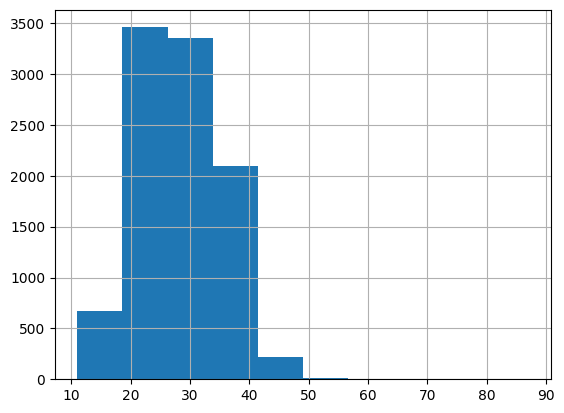

In [75]:
df_maes['idade_ultimo_parto'].hist()

<Axes: >

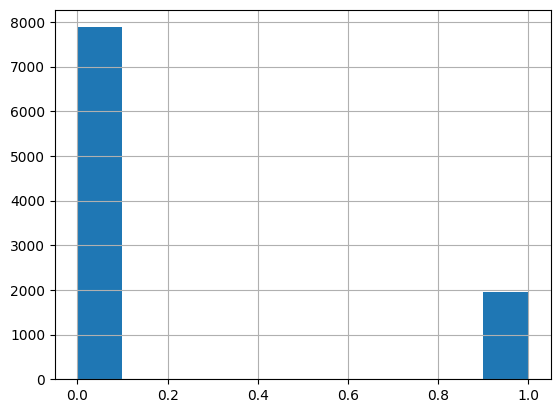

In [80]:
df_maes['parto_idade_avançada'].hist()

In [81]:
df_maes.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9831 entries, 0 to 9830
Data columns (total 141 columns):
 #    Column                   Non-Null Count  Dtype  
---   ------                   --------------  -----  
 0    Quantidade_moradores     9831 non-null   float64
 1    chave_domicio            9831 non-null   object 
 2    chave_pessoa             9831 non-null   object 
 3    UF_sigla                 9831 non-null   object 
 4    regiao_brasileira        9831 non-null   object 
 5    regiao_metropolitana     9831 non-null   object 
 6    sexo                     9831 non-null   object 
 7    dia_nascimento           9831 non-null   float64
 8    mes_nascimento           9831 non-null   float64
 9    ano_nascimento           9831 non-null   float64
 10   idade                    9831 non-null   float64
 11   peso                     9399 non-null   float64
 12   altura                   9399 non-null   float64
 13   imc                      9399 non-null   float64
 14   imc_cl

In [82]:
dicionario_1 = {
    "V0001": "Unidade da Federação",
    "V0026": "Tipo de situação censitária",
    "C001": "Quantidade de pessoas no domicílio",
    "C006": "Sexo",
    "C00701": "Dia de nascimento",
    "C00702": "Mês de nascimento",
    "C00703": "Ano de nascimento",
    "C008": "Idade do morador na data de referência",
    "D00201": "Frequenta escola ou creche",
    "D00901": "Qual foi o curso mais elevado que ___frequentou",
    "G046": "___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?",
    "G049": "____________ faz uso de aparelho auditivo",
    "G051": "____________ faz uso de implante coclear?",
    "G053": "____________ faz uso de sistema de frequência modulada individual (sistema FM)?",
    "G059": "___ usa algum aparelho de auxílio para se locomover?",
    "G060": "____________ faz uso de cadeira de rodas?",
    "G062": "____________ faz uso de bengala, muletas ou andador?",
    "G064": "____________ faz uso de prótese?",
    "G066": "____________ faz uso de órtese?",
    "G070": "___ tem dificuldade permanente de caminhar ou subir degraus?",
    "G072": "___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?",
    "G073": "____________ faz uso de prótese para os membros superiores?",
    "G079": "___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos?",
    "G083": "Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais.",
    "G084": "Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular?",
    "L021": "Foi realizado o teste do pezinho?",
    "L033": "O teste do coraçãozinho realizado deu resultado alterado?",
    "L037": "Vacina Penta (também chamada de Pentavalente, DTP/Hib/HB)",
    "L038": "Vacina Poliomielite (também chamada de gotinha, VIP, VOP, PÓLIO, ANTIPÓLIO, POLIOMIELITE, SABIN)",
    "L039": "Vacina Pneumocócica (também chamada de Pneumo 10, Pneumo 13, Pncc)",
    "L040": "Vacina Tríplice Viral (também chamada SCR, TRIVIRAL, TV, MMR).",
    "L01701": "Leite materno?",
    "L018": "Desde que ___________nasceu, tomou ou comeu outro alimento que não leite materno?",
    "L019": "Alguma vez ___________ recebeu Sulfato Ferroso?",
    "P00103": "Peso - Informado (em kg) (3 inteiros e 1 casa decimal)",
    "P00104": "Peso - Final (em kg) (3 inteiros e 1 casa decimal)",
    "P00403": "Altura - Informada (em cm) (3 inteiros)",
    "P00404": "Altura - Final (em cm) (3 inteiros)",
    "Q00201": "Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?",
    "Q00202": "Essa hipertensão arterial (pressão alta) ocorreu apenas durante algum período de gravidez?",
    "Q003": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de hipertensão arterial (pressão alta)?",
    "Q028": "Em geral, em que grau a hipertensão limita as suas atividades habituais?",
    "Q03001": "Algum médico já lhe deu o diagnóstico de diabetes?",
    "Q03002": "Esse diabetes ocorreu apenas durante algum período de gravidez?",
    "Q031": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico do diabetes?",
}

dicionario_2 = {
    "Q055011": "Problemas na vista",
    "Q055012": "Infarto ou AVC (Acidente Vascular cerebral) / derrame ou outro problema circulatório",
    "Q055013": "Problema nos rins",
    "Q060": "Algum médico já lhe deu o diagnóstico de colesterol alto?",
    "Q061": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de colesterol alto?",
    "Q06307": "Infarto",
    "Q06308": "Angina",
    "Q06309": "Insuficiência cardíaca",
    "Q06310": "Arritmia",
    "Q064": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico da doença do coração?",
    "Q068": "Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?",
    "Q070": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico do derrame (ou AVC)?",
    "Q074": "Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)?",
    "Q075": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de asma?",
    "Q079": "Algum médico já lhe deu o diagnóstico de artrite ou reumatismo?",
    "Q080": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de artrite ou reumatismo?",
    "Q084": "O(a) Sr(a) tem algum problema crônico de coluna, como dor crônica nas costas ou no pescoço?",
    "Q085": "Que idade o(a) Sr(a) tinha quando começou o problema na coluna?",
    "Q087": "Em geral, em que grau o problema na coluna limita as suas atividades habituais?",
    "Q088": "Algum médico já lhe deu o diagnóstico de DORT?",
    "Q08901": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de DORT?",
    "Q091": "Em geral, em que grau o DORT limita as suas atividades habituais?",
    "Q092": "Algum médico ou profissional de saúde mental já lhe deu o diagnóstico de depressão?",
    "Q09301": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão?",
    "Q109": "Em geral, em que grau a depressão limita as suas atividades habituais?",
    "Q11007": "Diagnóstico de Esquizofrenia",
    "Q11008": "Diagnóstico de Transtorno bipolar",
    "Q11009": "Diagnóstico de TOC (Transtorno obsessivo compulsivo)",
    "Q111": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?",
    "Q11604": "Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão?",
    "Q11605": "Diagnóstico de enfisema pulmonar",
    "Q11606": "Diagnóstico de bronquite crônica",
    "Q11701": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico dessa(s) doença(s) no pulmão?",
    "Q120": "Algum médico já lhe deu diagnóstico de câncer?",
    "Q12201": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?",
    "Q124": "Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?",
    "Q125": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de insuficiência renal crônica?",
    "R025": "Com que idade a sra ficou menstruada pela primeira vez?",
    "R026": "A sra ainda fica menstruada?",
    "R027": "Com que idade a sra parou de menstruar?",
    "R028": "A sra já entrou na menopausa?",
    "R029": "Alguma vez a sra fez ou faz tratamento hormonal para alívio dos sintomas da menopausa?",
    "R034": "A sra usa algum método para evitar a gravidez atualmente?",
    "R035": "Qual o principal motivo de não evitar a gravidez?",
    "R03601": "Pilula?",
    "R037": "A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?",
    "R038": "Há quanto tempo a sra está tentando engravidar?",
    "S065": "Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?",
    "S066": "Quantos partos a Sra já teve?",
    "S06701": "Em que data foi o último parto?",
    "S068": "Quando estava grávida fez alguma consulta de pré-natal?",
    "S070": "Quantas consultas de pré-natal fez durante esta gravidez?",
    "S082": "Qual foi o resultado do teste/exame para sífilis?",
    "S083": "Recebeu tratamento para sífilis?",
    "S086": "Qual foi o resultado do teste/exame para sífilis do seu parceiro?",
    "S087": "O seu parceiro foi tratado?",
    "S095": "Durante o pré-natal a Sra foi orientada a usar preservativo?",
    "S096": "Quanto tempo antes do parto a Sra foi à última consulta do pré-natal?",
    "S098": "Quando estava grávida tomou alguma injeção para prevenir o bebê contra difteria e tétano?",
    "S099": "Quantas doses dessa injeção tomou durante esta gravidez?",
    "S110": "Qual foi o peso dele(a) ao nascer?",
    "S112": "Onde foi realizado o parto?",
    "S115": "Qual foi o tipo de parto?",
    "S116": "Nesta gravidez, entrou em trabalho de parto?",
    "S117": "Qual o principal motivo de ter tido parto cesáreo?",
    "S125": "Teve alguma complicação durante o parto?",
    "S127": "Por causa dessa complicação precisou ser internada?",
    "W001": "Antropometria aferida do morador selecionado",
    "W00203": "Altura - Final (em cm)(3 inteiros e 1 casa decimal)",
    "VDL001": "Idade em meses das crianças nascidas no período de referência do Módulo L",
}

dicionarios = dicionario_1 | dicionario_2

In [85]:
for col in df_maes.columns:
  if col in dicionarios:  # Verificar se `col` está no dicionário
        print(f"Chave: {col}, Valor: {dicionarios[col]}")
  print(df_maes[col].value_counts(dropna=False))
  print('\n\n')

Quantidade_moradores
3.0     3178
4.0     3039
5.0     1515
2.0      917
6.0      601
7.0      258
8.0      117
1.0       99
9.0       55
10.0      24
11.0       8
12.0       8
13.0       7
15.0       2
16.0       1
23.0       1
14.0       1
Name: count, dtype: int64



chave_domicio
53_5310220_530044434_11    1
11_1110011_110000016_5     1
11_1110011_110000016_15    1
11_1110011_110000034_10    1
11_1110011_110000153_3     1
                          ..
11_1110011_110003808_14    1
11_1110011_110003808_13    1
11_1110011_110003808_7     1
11_1110011_110003808_5     1
11_1110011_110002149_14    1
Name: count, Length: 9831, dtype: int64



chave_pessoa
53_5310220_530044434_11_1.0    1
11_1110011_110000016_5_1.0     1
11_1110011_110000016_15_5.0    1
11_1110011_110000034_10_1.0    1
11_1110011_110000153_3_1.0     1
                              ..
11_1110011_110003808_14_2.0    1
11_1110011_110003808_13_1.0    1
11_1110011_110003808_7_1.0     1
11_1110011_110003808_5_1.0     1
11_1110011

In [86]:
df_maes

,Quantidade_moradores,chave_domicio,chave_pessoa,UF_sigla,regiao_brasileira,regiao_metropolitana,sexo,dia_nascimento,mes_nascimento,ano_nascimento,...,W001,W00101,W00102,W00103,W00201,W00202,W00203,VDL001,idade_ultimo_parto,parto_idade_avançada
0,2.0,11_1110011_110000016_5,11_1110011_110000016_5_1.0,Rondônia,Norte,Urbano,Feminino,30.0,7.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0
1,5.0,11_1110011_110000016_15,11_1110011_110000016_15_5.0,Rondônia,Norte,Urbano,Feminino,15.0,6.0,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0
2,2.0,11_1110011_110000034_10,11_1110011_110000034_10_1.0,Rondônia,Norte,Urbano,Feminino,31.0,10.0,1985.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,0
3,4.0,11_1110011_110000153_3,11_1110011_110000153_3_1.0,Rondônia,Norte,Urbano,Feminino,5.0,3.0,1989.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0
4,5.0,11_1110011_110000584_14,11_1110011_110000584_14_1.0,Rondônia,Norte,Urbano,Feminino,12.0,11.0,1992.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,4.0,53_5310220_530037924_11,53_5310220_530037924_11_1.0,Distrito Federal,Centro-Oeste,Rural,Feminino,26.0,4.0,1989.0,...,1.0,60.2,60.3,60.3,160.3,160.4,160.4,NaN,24.0,0
9827,3.0,53_5310220_530038867_6,53_5310220_530038867_6_1.0,Distrito Federal,Centro-Oeste,Rural,Feminino,28.0,12.0,1995.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0
9828,5.0,53_5310220_530041727_10,53_5310220_530041727_10_2.0,Distrito Federal,Centro-Oeste,Rural,Feminino,9.0,10.0,1980.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,0
9829,6.0,53_5310220_530044434_8,53_5310220_530044434_8_1.0,Distrito Federal,Centro-Oeste,Rural,Feminino,11.0,2.0,1993.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0


In [87]:
df_maes.to_csv('data/df_maes.csv', index=False)